# Indeed inspiring infotech inernship

# Assignment 3

# Introduction to Unsupervised Learning

        - Clustering of countries based on development status.

Author- Mohan Bodake

# Introduction

# Unsupervised Learning-

Unsupervised learning is a machine learning technique, where you do not need to supervise the model. Instead, you need to allow the model to work on its own to discover information. It mainly deals with the unlabelled data.

Unsupervised learning algorithms allow you to perform more complex processing tasks compared to supervised learning. Although, unsupervised learning can be more unpredictable compared with other natural learning deep learning and reinforcement learning methods.

Here, are prime reasons for using Unsupervised Learning:

Unsupervised machine learning finds all kind of unknown patterns in data.
Unsupervised methods help you to find features which can be useful for categorization.
It is taken place in real time, so all the input data to be analyzed and labeled in the presence of learners.
It is easier to get unlabeled data from a computer than labeled data, which needs manual intervention.

In this project we take a look on Hierarchical Clustering.

# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. There are two types of hierarchical clustering: Agglomerative and Divisive. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points. Form a cluster by joining the two closest data points resulting in K-1 clusters. Repeat the above steps until one big cluster is formed. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df=pd.read_csv("C:\\Users\\BusinessComputers.in\\Downloads\\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
df.shape

(167, 10)

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

There is no any missing value or any duplicate value in our dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# Data Visualization

Correlation Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

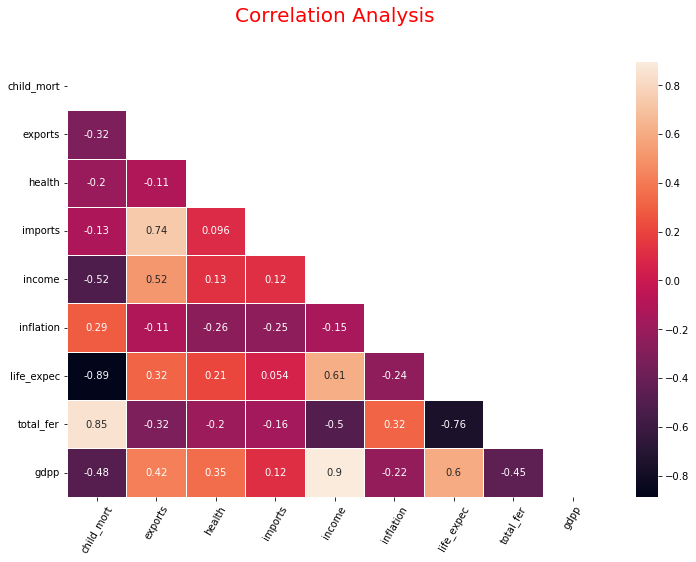

In [12]:
df = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']] #Subsetting the data

plt.figure(figsize=(12,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidth=.5);
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show

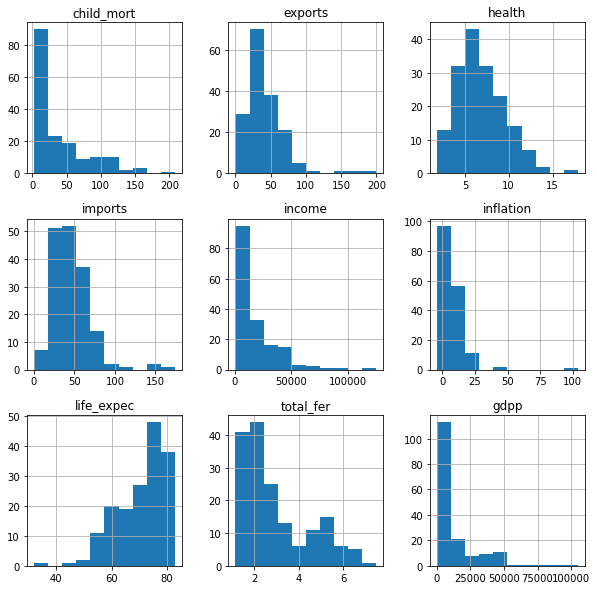

In [13]:
df.hist(figsize =(10,10))
plt.show()

# Apply Agglomerative Clustering

In [14]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [15]:
clust_labels1 = doAgglomerative(df, 3)
agglomerative = pd.DataFrame(clust_labels1)
df.insert((df.shape[1]),'agglomerative',agglomerative)

In [16]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


# Plotting Cluster Points

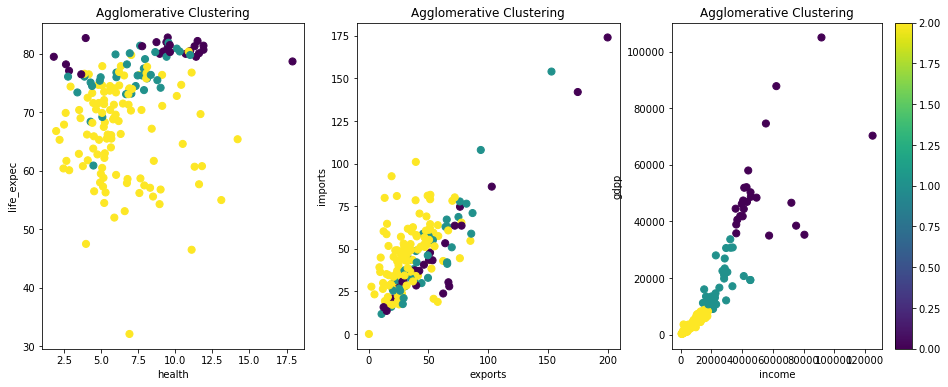

In [17]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols= 3)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of health vs life_expec
scatter = ax0.scatter(df['health'],df['life_expec'],c=agglomerative[0],s=50)
ax0.set_title('Agglomerative Clustering')
ax0.set_xlabel('health')
ax0.set_ylabel('life_expec')

# Scatter plots of imports vs exports

scatter = ax1.scatter(df['exports'],df['imports'],c=agglomerative[0],s=50)
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('exports')
ax1.set_ylabel('imports')

# Scatter plots of imports vs exports

scatter = ax2.scatter(df['income'],df['gdpp'],c=agglomerative[0],s=50)
ax2.set_title('Agglomerative Clustering')
ax2.set_xlabel('income')
ax2.set_ylabel('gdpp')
plt.colorbar(scatter)

In [18]:
label_mapping = {0:"cluster0",1:"cluster1",2:"cluster2"}
df["cluster_name"] = df["agglomerative"].apply(lambda x: label_mapping[x])

In [19]:
df[df['cluster_name'] == "cluster0"]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative,cluster_name
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,cluster0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,cluster0
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,cluster0
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,cluster0
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,cluster0
44,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,cluster0
53,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,cluster0
54,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0,cluster0
58,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,0,cluster0
68,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,0,cluster0


In [20]:
df[df['cluster_name'] == "cluster1"]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative,cluster_name
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,cluster1
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,cluster1
10,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1,cluster1
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1,cluster1
13,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1,cluster1
22,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,1,cluster1
33,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,1,cluster1
41,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,1,cluster1
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1,cluster1
43,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1,cluster1


In [21]:
df[df['cluster_name'] == "cluster2"]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative,cluster_name
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,cluster2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,cluster2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,cluster2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,cluster2
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2,cluster2
...,...,...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2,cluster2
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,cluster2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,cluster2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,cluster2


# Compare Clusters using Box Plot

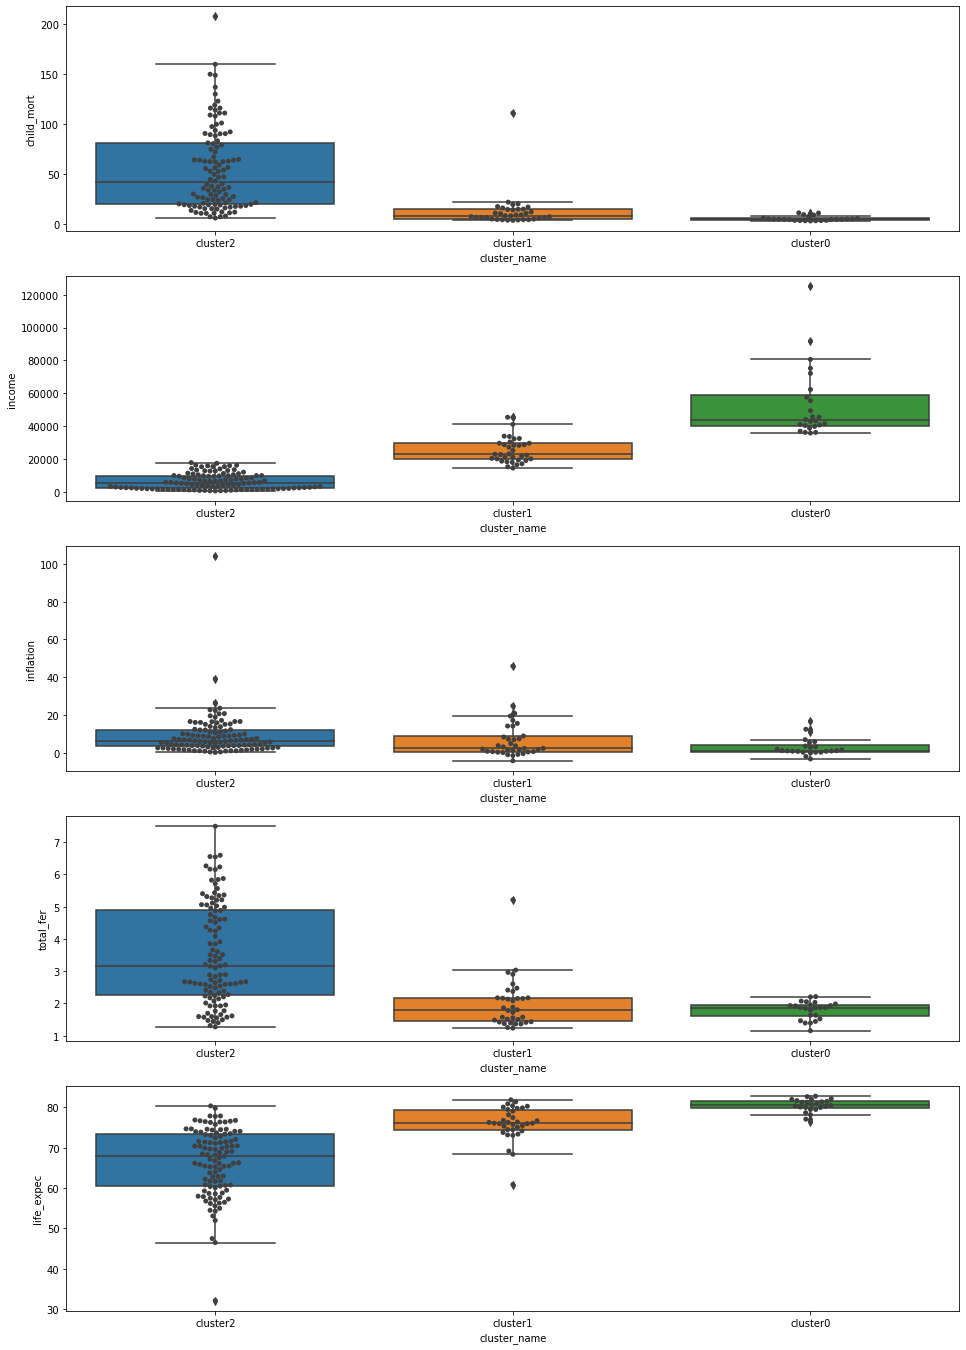

In [22]:
fig, (ax,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='child_mort', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='child_mort', data=df,color=".25",ax= ax)

x = sns.boxplot(x="cluster_name", y='income', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='income', data=df,color=".25",ax= ax2)

x = sns.boxplot(x="cluster_name", y='inflation', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='inflation', data=df,color=".25",ax= ax3)

x = sns.boxplot(x="cluster_name", y='total_fer', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='total_fer', data=df,color=".25",ax= ax4)

x = sns.boxplot(x="cluster_name", y='life_expec', data=df, ax= ax5)
x = sns.swarmplot(x="cluster_name", y='life_expec', data=df,color=".25",ax= ax5)

# Dendrogram

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

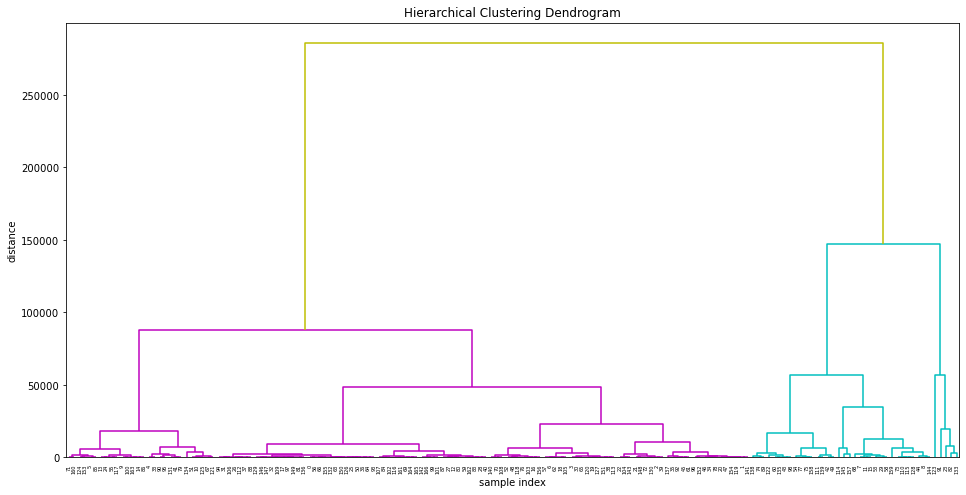

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
df = df.set_index('agglomerative')

from scipy.cluster import hierarchy
Z = hierarchy.linkage(df.iloc[:,1:7],method='ward')
hierarchy.set_link_color_palette(['m', 'c', 'y'])
fig, axes = plt.subplots(figsize=(16, 8))
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y',
                           orientation='top')
# dn2 = hierarchy.dendrogram(Z, ax=axes[1],
#                            above_threshold_color='#bcbddc',
#                            orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [24]:
print("Avg income of cluster0",df[df['cluster_name'] == "cluster0"]["income"].mean())

Avg income of cluster0 53250.0


In [25]:
print("Avg income of cluster1",df[df['cluster_name'] == "cluster1"]["income"].mean())

Avg income of cluster1 25505.714285714286


In [26]:
print("Avg income of cluster2",df[df['cluster_name'] == "cluster2"]["income"].mean())

Avg income of cluster2 6411.694444444444


# Accuracy 

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(agglomerative, clust_labels1)

1.0

# Observations From Algorithm

   cluster0

1.low child death rate

2.avg life span - 80 year (high)

3.avg income - 53250.0 (high)

4.more spend on health 

5.inflation rate is low

  cluster1

1.moderate child death rate

2.avg lifespan - 76 years

3.avg income - 25505.71

4.more spend on health

5.inflation rate is low

   cluster2

1.high child death rate

2.avg life span - 66 year

3.avg income - 6411.69

4.less spend on health

5.inflation rate is high

# Conclusion-

1.The developed countries are clustered in cluster0

2.The developing countries are clustered in cluster1

3.The undeveloped countries are clustered in cluster2